In [1]:
import pandas as pd

In [2]:
dt=pd.read_excel("train.xlsx")

In [3]:
dt

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2


C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


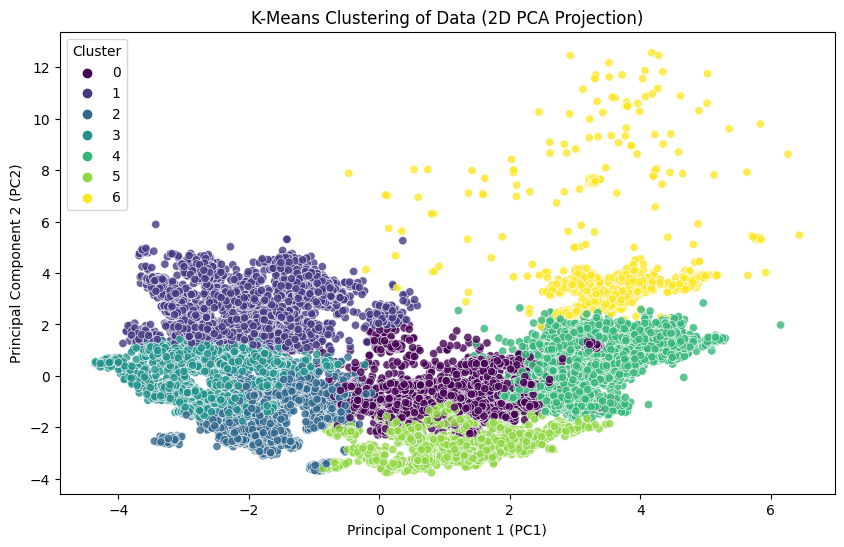

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is a dataframe with columns T1 to T18

data=dt.drop(['target'],axis=1,inplace=False)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Number of clusters (you can adjust this based on your preference)
num_clusters = 7


# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_standardized)

# Add cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Add cluster labels to the PCA dataframe
data_pca_df['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca_df, palette='viridis', legend='full', alpha=0.8)
plt.title('K-Means Clustering of Data (2D PCA Projection)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


In [5]:
data['Cluster'] = kmeans.labels_

In [6]:
data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,5
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,0
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,0
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,5
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,4
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,4


In [7]:
dt['Cluster'] = kmeans.labels_
dt

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19,5
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22,0
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95,B34,0
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64,B15,5
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74,A6,4
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81,B2,4


In [8]:
# Assuming 'target' contains categorical labels
# cluster_stats = data.groupby(['Cluster']).size().reset_index(name='count')

cluster_stats = dt.groupby(['Cluster']).agg(['mean', 'median', 'count']).reset_index()
print(cluster_stats)


  Cluster         T1                      T2                      T3         \
                mean median count       mean median count       mean median   
0       0 -67.808684  -66.0  5389 -63.983485  -62.0  5389 -59.395621  -60.0   
1       1 -75.155149  -75.0  6613 -74.134130  -73.0  6613 -72.189626  -72.0   
2       2 -67.277612  -67.0  5360 -66.409888  -65.0  5360 -63.838246  -63.0   
3       3 -68.330828  -68.0  6121 -68.360235  -69.0  6121 -67.459565  -66.0   
4       4 -55.408357  -56.0  6007 -57.916431  -58.0  6007 -64.149659  -64.0   
5       5 -58.409325  -58.0  5426 -54.652414  -57.0  5426 -56.558607  -56.0   
6       6 -70.608388  -67.0  1836 -63.952070  -64.0  1836 -69.956972  -68.0   

         ...   T15        T16                     T17                     T18  \
  count  ... count       mean median count       mean median count       mean   
0  5389  ...  5389 -69.326035  -68.0  5389 -71.362219  -70.0  5389 -73.543886   
1  6613  ...  6613 -62.168910  -61.0  6613 -6

C:\Users\91897\AppData\Local\Temp\ipykernel_20252\2706279856.py:4: FutureWarning: ['target'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_stats = dt.groupby(['Cluster']).agg(['mean', 'median', 'count']).reset_index()


In [9]:
cluster_stats = dt.groupby('target')['Cluster'].agg(['mean', 'median', 'count']).reset_index()


In [10]:
print(cluster_stats)

    target      mean  median  count
0       A1  4.000000     4.0    215
1      A10  4.000000     4.0    204
2      A11  4.000000     4.0    212
3      A12  3.980296     4.0    203
4      A13  6.000000     6.0    219
..     ...       ...     ...    ...
155    B78  1.000000     1.0    209
156    B79  1.000000     1.0    216
157     B8  5.000000     5.0    214
158    B80  1.000000     1.0    207
159     B9  6.000000     6.0    211

[160 rows x 4 columns]


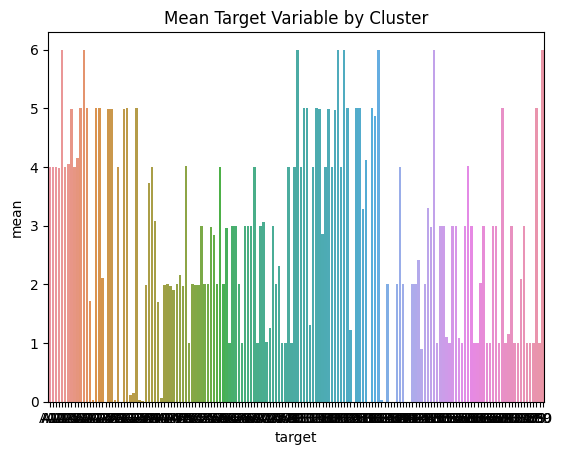

In [11]:
sns.barplot(x='target', y='mean', data=cluster_stats)
plt.title('Mean Target Variable by Cluster')
plt.show()


C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
2024-02-12 11:18:26.160 
  command:

    streamlit run C:\python\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

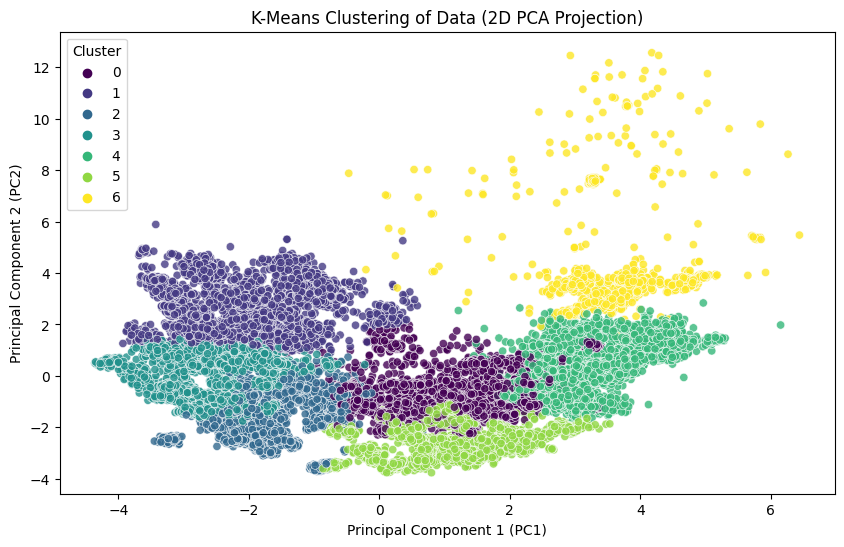

In [13]:
import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (assuming it's a CSV file)
# Replace 'your_data.csv' with the actual path to your dataset
dt=pd.read_excel("train.xlsx")

# Assuming your data is a dataframe with columns T1 to T18
data = dt.drop(['target'], axis=1, inplace=False)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Number of clusters (you can adjust this based on your preference)
num_clusters = 7

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_standardized)

# Add cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Add cluster labels to the PCA dataframe
data_pca_df['Cluster'] = kmeans.labels_

# Streamlit app
st.title('K-Means Clustering App')

# Display the original dataframe
st.subheader('Original Data with Cluster Labels')
st.write(data)

# Plot clusters using PCA
st.subheader('K-Means Clustering Visualization (2D PCA Projection)')
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca_df, palette='viridis', legend='full', alpha=0.8, ax=ax)
plt.title('K-Means Clustering of Data (2D PCA Projection)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
st.pyplot(fig)
